<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Read-Files" data-toc-modified-id="Read-Files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read Files</a></span></li><li><span><a href="#Clean-Data:-Missing-values" data-toc-modified-id="Clean-Data:-Missing-values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clean Data: Missing values</a></span></li><li><span><a href="#Select-Columns" data-toc-modified-id="Select-Columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Select Columns</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Set-Current-disagg" data-toc-modified-id="Set-Current-disagg-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Set Current disagg</a></span></li><li><span><a href="#Get-X_train-and-y_train" data-toc-modified-id="Get-X_train-and-y_train-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Get X_train and y_train</a></span></li><li><span><a href="#Vectorizer" data-toc-modified-id="Vectorizer-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Vectorizer</a></span><ul class="toc-item"><li><span><a href="#Import-Vectorizer" data-toc-modified-id="Import-Vectorizer-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Import Vectorizer</a></span></li><li><span><a href="#Add-features" data-toc-modified-id="Add-features-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Add features</a></span></li><li><span><a href="#Import-Labels" data-toc-modified-id="Import-Labels-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Import Labels</a></span></li><li><span><a href="#Update-data" data-toc-modified-id="Update-data-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Update data</a></span></li></ul></li><li><span><a href="#Predict" data-toc-modified-id="Predict-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Predict</a></span></li><li><span><a href="#Update-DataFrame-for-export" data-toc-modified-id="Update-DataFrame-for-export-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Update DataFrame for export</a></span></li><li><span><a href="#View-data" data-toc-modified-id="View-data-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>View data</a></span></li><li><span><a href="#Spot-Checking" data-toc-modified-id="Spot-Checking-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Spot Checking</a></span><ul class="toc-item"><li><span><a href="#Category-0" data-toc-modified-id="Category-0-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Category 0</a></span></li><li><span><a href="#Category-1" data-toc-modified-id="Category-1-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Category 1</a></span></li><li><span><a href="#Category-2" data-toc-modified-id="Category-2-12.3"><span class="toc-item-num">12.3&nbsp;&nbsp;</span>Category 2</a></span></li><li><span><a href="#Category-3" data-toc-modified-id="Category-3-12.4"><span class="toc-item-num">12.4&nbsp;&nbsp;</span>Category 3</a></span></li><li><span><a href="#Category-4" data-toc-modified-id="Category-4-12.5"><span class="toc-item-num">12.5&nbsp;&nbsp;</span>Category 4</a></span></li><li><span><a href="#Category-5" data-toc-modified-id="Category-5-12.6"><span class="toc-item-num">12.6&nbsp;&nbsp;</span>Category 5</a></span></li><li><span><a href="#Category-6" data-toc-modified-id="Category-6-12.7"><span class="toc-item-num">12.7&nbsp;&nbsp;</span>Category 6</a></span></li></ul></li><li><span><a href="#Export-Dataframe" data-toc-modified-id="Export-Dataframe-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Export Dataframe</a></span></li></ul></div>

Note, this version has broadcat joined using tags

# Libraries

In [6]:
#pip install --upgrade numpy
#!pip install xgboost
#!pip install wordcloud
#!pip install spacy

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/72/49/bd65abe76607c86dc1f104ad545eeb3e771f474b7e259e64e5a16614615b/spacy-3.7.5-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/7a/05/4a3b5c3043c6d84c00bf0f574d326660702b1c10174fe6b44cef3c3dff08/murmurhash-1.0.10-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/p

In [4]:
import os

new_working_directory = '/Volumes/Elements/CF_dataset 2'

try:
    os.chdir(new_working_directory)
    current_dir = os.getcwd()
    print("Changed to directory:", current_dir)
except FileNotFoundError as e:
    print(f"Error: {e}. The directory does not exist.")
except PermissionError as e:
    print(f"Error: {e}. You do not have permission to access this directory.")


Changed to directory: /Volumes/Elements/CF_dataset 2


In [5]:
import pandas as pd  #dataframe
import numpy as np  #stats
import pickle  #loading data
# !pip install -U spacy
# !python -m spacy download en_core_web_sm
import re  #regex

from sklearn.model_selection import cross_val_score  # cross validation
from sklearn.model_selection import StratifiedKFold # cross validation

from sklearn.model_selection import train_test_split  #train_test_split
from sklearn.feature_extraction.text import CountVectorizer  #vectorizer
from sklearn.feature_extraction.text import TfidfTransformer  #tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB  #model

from sklearn.pipeline import Pipeline  # Pipeline

import string  # for punctuations

import matplotlib.pyplot as plt  # visualization
import seaborn as sns  #  visualization

from scipy.sparse import csr_matrix  # dealing with sparse matrix
from scipy.sparse import hstack  # joining sparse matrix
from scipy.sparse import vstack  # joining sparse matrix

from sklearn.metrics import confusion_matrix #metrics
from sklearn import metrics #metrics


from sklearn.tree import DecisionTreeClassifier # Decision tree
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes
from sklearn.ensemble import RandomForestClassifier # random forest
#!pip install xgboost==1.5
from xgboost import XGBClassifier # XGBoost classifier
from sklearn.ensemble import AdaBoostClassifier # adaptive boosting classifier
from sklearn.svm import SVC # Support Vector Machine

import re #regex
from wordcloud import WordCloud #wordcloud
from gensim.utils import simple_preprocess # preprocessing lda
import nltk # for stopwords
nltk.download('stopwords') #stopwords
from nltk.corpus import stopwords #stopwords
import gensim #lda
import gensim.corpora as corpora #lda
from pprint import pprint #lda
from gensim.models import CoherenceModel #metrics
from nltk.stem.snowball import SnowballStemmer # for stemming

import spacy # for lemmatization

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yaoyuxin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Read Files

In [7]:
# Code to retrieve pickle
# use pickle to retrieve

file = open("df.sav", 'rb')
df = pickle.load(file)
file.close()

In [8]:
# view stats and description
display(df.info(verbose = True, show_counts=True))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1117146 entries, 0 to 301770
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1117146 non-null  int64  
 1   adsh               1117146 non-null  object 
 2   report             1117146 non-null  int64  
 3   line               1117146 non-null  int64  
 4   stmt               1117146 non-null  object 
 5   inpth              1117146 non-null  int64  
 6   tag                1117146 non-null  object 
 7   version_x          1117146 non-null  object 
 8   prole              1117146 non-null  object 
 9   plabel             1117130 non-null  object 
 10  negating           1117146 non-null  int64  
 11  cik                1117146 non-null  int64  
 12  name               1117146 non-null  object 
 13  sic                1117146 non-null  float64
 14  form               1117146 non-null  object 
 15  aggregation_level  1117146 non-null  i

None

,Unnamed: 0,report,line,inpth,negating,cik,sic,aggregation_level
count,1.117146e+06,1.117146e+06,1.117146e+06,1.117146e+06,1.117146e+06,1.117146e+06,1.117146e+06,1.117146e+06
mean,9.801358e+06,6.534911e+00,7.196157e+00,7.948827e-04,2.532006e-01,1.164214e+06,4.444625e+03,4.806712e+00
std,5.834446e+06,1.082882e+00,5.507235e+00,2.818247e-02,4.348450e-01,5.107724e+05,2.093821e+03,4.849207e+00
min,1.410000e+02,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.750000e+03,1.000000e+02,1.000000e+00
25%,5.056928e+06,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,8.879210e+05,2.834000e+03,1.000000e+00
50%,9.840552e+06,6.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,1.297989e+06,3.826000e+03,2.000000e+00
75%,1.433355e+07,7.000000e+00,1.000000e+01,0.000000e+00,1.000000e+00,1.576940e+06,5.912000e+03,1.100000e+01
max,2.175411e+07,3.800000e+01,1.060000e+02,1.000000e+00,1.000000e+00,1.937653e+06,9.995000e+03,1.500000e+01


# Clean Data: Missing values

In [9]:
# check where broad_cat is null

df[df["broad_cat"].isnull()]["plabel"].value_counts()

plabel
Product and Service         45
RestatementDomain           35
Revision of Prior Period    10
Name: count, dtype: int64

In [10]:
# Percentage of nulls

sum(df["broad_cat"].isnull())/df.shape[0]*100

0.00805624332003158

**Observations:** Null values are less than 5% of total dataset. We can therefore safely drop them

In [11]:
# Drop Null values
df.dropna(inplace=True)

# Select Columns

In [12]:
# df_focus = df[["tag"] + ["plabel"] + ["broad_cat"] + list(df.filter(regex="interact").columns) + 
#                                list(df.filter(regex="presence").columns)].copy()

In [13]:
df_focus = df.copy()

# Preprocessing

In [14]:
df_focus["plabel"] = df_focus["plabel"].apply(lambda x: x.lower())  #lower
df_focus["plabel"] = df_focus["plabel"].apply(lambda x: x.strip())  #remove spaces
df_focus["plabel"] = df_focus["plabel"].apply(
    lambda x: re.compile('<.*?>').sub(' ', x))  # remove punctuations
df_focus["plabel"] = df_focus["plabel"].apply(
    lambda x: re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', x))
df_focus["plabel"] = df_focus["plabel"].apply(
    lambda x: re.sub('\s+', ' ', x))  # remove spaces
df_focus["plabel"] = df_focus["plabel"].apply(
    lambda x: re.sub(r'\[[0-9]*\]', ' ', x))  # remove digits
df_focus["plabel"] = df_focus["plabel"].apply(lambda x: re.sub(r'[^\w\s]', '',
                                                   str(x).lower().strip()))
df_focus["plabel"] = df_focus["plabel"].apply(lambda x: re.sub(r'\d', ' ', x))
df_focus["plabel"] = df_focus["plabel"].apply(lambda x: re.sub(r'\s+', ' ', x))

In [15]:
# create functions
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', "jbe"]) # extend stopwords

# remove punctuation
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(simple_preprocess(str(sentence), deacc=True))

        
# # remove stopwords
# def remove_stopwords(texts):
#     return [[word for word in simple_preprocess(str(doc)) 
#              if word not in stop_words] for doc in texts]
# create bigrams
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# create trigrams
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#stemming
def stemming(text):
    texts_out = []
    for sent in text:
        texts_out.append([stemmer.stem(y) for y in sent])
    return texts_out

#Create sentence again for dataframe updation
def word_to_sent(text):
    texts_out = []
    for word in text:
        texts_out.append(" ".join(y for y in word))
    return texts_out

In [16]:
%%time

# Preprocess plabel

# data words
data = df_focus.plabel.values.tolist()
data_words_plabel = list(sent_to_words(data))

# bigram and trigrams phraser
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words_plabel, min_count=2, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words_plabel], threshold=10)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# # remove stop words
# data_words_plabel = remove_stopwords(data_words_plabel)

# form bigrams
data_words_plabel = make_bigrams(data_words_plabel)

# # Do stemming
# # Use English stemmer.
# stemmer = SnowballStemmer("english")
# data_words_plabel = stemming(data_words_plabel)

# Get data in sentence form
data_sent_plabel = word_to_sent(data_words_plabel)

CPU times: user 13.6 s, sys: 119 ms, total: 13.7 s
Wall time: 13.8 s


In [17]:
# Update DataFrame

df_focus["plabel_proc"] = data_sent_plabel

**Next we check different models**

# Set Current disagg

In [18]:
current_disagg = "broad_cat"

# Get X_train and y_train

In [19]:
# Get dependent and independent variables

X_train = df_focus.drop(["broad_cat"], axis = 1)
y_train = df_focus[["broad_cat"]]

# Vectorizer

We use tfidf for this

## Import Vectorizer

In [20]:
# Import vectorizer

file = open("tfidf_disagg_"+str(current_disagg)+".sav",'rb')
td_broad_cat = pickle.load(file)
file.close()


/Users/yaoyuxin/anaconda3/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/yaoyuxin/anaconda3/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Add features

In [21]:
# Vectorize the text column

X_train_dtm = td_broad_cat.transform(X_train["plabel_proc"])

In [22]:
# Check number of tokens

display(X_train_dtm.shape)

# Some examples
list(td_broad_cat.vocabulary_.items())[:5]

(1117040, 2081)

[('gain', 813), ('loss', 1109), ('on', 1317), ('disposal', 568), ('of', 1303)]

In [23]:
# Preprocess additional features

## training set
X_train_add_features = X_train[list(X_train.filter(regex="interact").columns) + 
                               list(X_train.filter(regex="presence").columns)]
X_train_add_features_sparse = csr_matrix(X_train_add_features.to_numpy())  # convert to numpy first, then sparse matrix
X_train_modeling = hstack([X_train_dtm, X_train_add_features_sparse])  # concatenate sparse matrix

## Import Labels

In [24]:
# Import

file = open("labels_to_ids_"+str(current_disagg)+".sav",'rb')
labels_to_ids = pickle.load(file)
file.close()

file = open("ids_to_labels_"+str(current_disagg)+".sav",'rb')
ids_to_labels = pickle.load(file)
file.close()

## Update data

In [25]:
# Get label dictionary for future mapping


labels_to_ids, ids_to_labels

({'IntExp': 0,
  'NonOp': 1,
  'Tax': 2,
  'OpExp': 3,
  'Revenues': 4,
  'Profitability': 5,
  'PerShare': 6},
 {0: 'IntExp',
  1: 'NonOp',
  2: 'Tax',
  3: 'OpExp',
  4: 'Revenues',
  5: 'Profitability',
  6: 'PerShare'})

In [26]:
# get label names
labelnames = [str(x) for x in list(labels_to_ids.keys())]

In [27]:
# map training y
y_train = y_train[str(current_disagg)].map(labels_to_ids).values
y_train

array([0, 0, 0, ..., 3, 3, 3])

# Predict

In [28]:
# Import model

file = open("model_disagg_"+str(current_disagg)+".sav",'rb')
model_broad_cat = pickle.load(file)
file.close()

/Users/yaoyuxin/anaconda3/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [29]:
# predict
y_pred = model_broad_cat.predict(X_train_modeling)

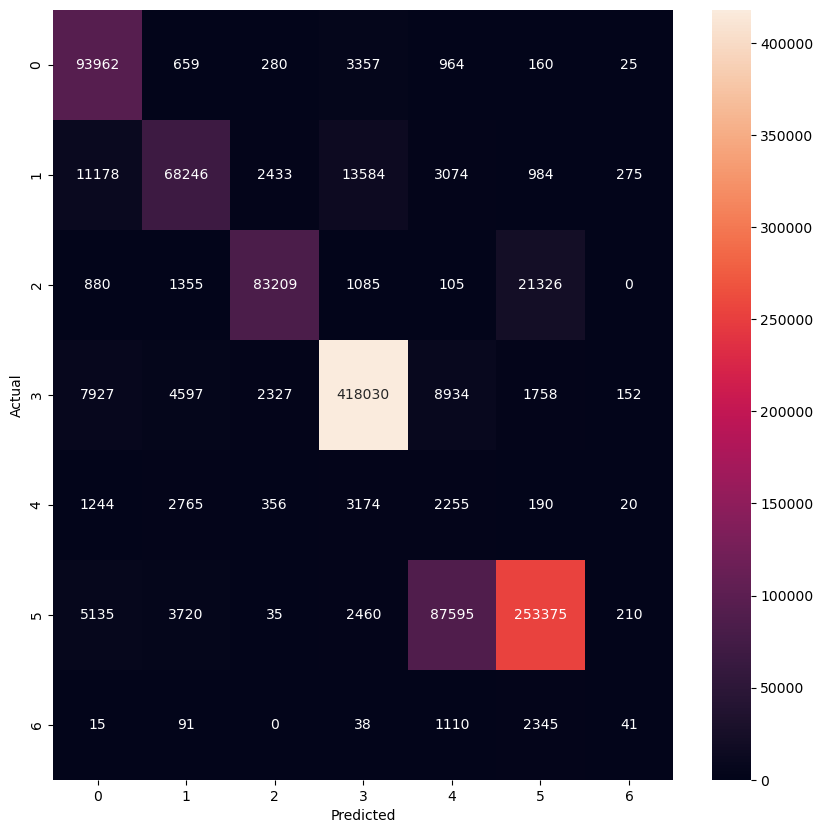

CPU times: user 1.26 s, sys: 579 ms, total: 1.84 s
Wall time: 403 ms


In [30]:
%%time
conf_mat = confusion_matrix(y_train, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat,
            annot=True,
            fmt='d',
            xticklabels=range(len(labelnames)),
            yticklabels=range(len(labelnames)))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("lvl_broad_cat_confusion_matrix_all_data.png")
plt.show()

**We update labelnames for result. It is possible that not all values from train are always present in test set. Not because of data imbalance. But because of wrong prediction, since we halt prediction for those values which have no further disaggregation possible**

In [31]:
# update labelnames for test

vals_to_drop = list(set(labels_to_ids.values()) - set(y_train) - set(y_pred))

labels_to_ids_result = {key:val for key, val in labels_to_ids.items() if val not in vals_to_drop}

labelnames_result = [str(x) for x in list(labels_to_ids_result.keys())]

In [32]:

print('accuracy %s' % metrics.accuracy_score(y_pred, y_train))
print(metrics.classification_report(y_train, y_pred, zero_division=0, target_names=labelnames_result))

accuracy 0.8228156556613908
               precision    recall  f1-score   support

       IntExp       0.78      0.95      0.86     99407
        NonOp       0.84      0.68      0.75     99774
          Tax       0.94      0.77      0.85    107960
        OpExp       0.95      0.94      0.94    443725
     Revenues       0.02      0.23      0.04     10004
Profitability       0.90      0.72      0.80    352530
     PerShare       0.06      0.01      0.02      3640

     accuracy                           0.82   1117040
    macro avg       0.64      0.61      0.61   1117040
 weighted avg       0.90      0.82      0.85   1117040



# Update DataFrame for export

In [33]:
# get dataframe

df_focus["y_actual"] = y_train
df_focus["y_pred"] = y_pred

df_focus["broad_cat_pred"] = df_focus["y_pred"].map(
    ids_to_labels).values


# View data

In [34]:
df_focus.head()

,Unnamed: 0,adsh,report,line,stmt,inpth,tag,version_x,prole,plabel,...,name,sic,form,aggregation_level,broad_cat,version_y,plabel_proc,y_actual,y_pred,broad_cat_pred
0,1884297,0001434728-19-000051,7,6,CF,0,WriteOffOfDeferredDebtIssuanceCost,us-gaap/2018,terseLabel,write off of debt issuance costs,...,"GLOBAL WATER RESOURCES, INC.",4941.0,10-K,1,IntExp,us-gaap/2018,write off of debt issuance costs,0,0,IntExp
1,1884297,0001434728-19-000051,7,6,CF,0,WriteOffOfDeferredDebtIssuanceCost,us-gaap/2018,terseLabel,write off of debt issuance costs,...,"GLOBAL WATER RESOURCES, INC.",4941.0,10-K,1,IntExp,us-gaap/2019,write off of debt issuance costs,0,0,IntExp
2,1884297,0001434728-19-000051,7,6,CF,0,WriteOffOfDeferredDebtIssuanceCost,us-gaap/2018,terseLabel,write off of debt issuance costs,...,"GLOBAL WATER RESOURCES, INC.",4941.0,10-K,1,IntExp,us-gaap/2020,write off of debt issuance costs,0,0,IntExp
3,1884297,0001434728-19-000051,7,6,CF,0,WriteOffOfDeferredDebtIssuanceCost,us-gaap/2018,terseLabel,write off of debt issuance costs,...,"GLOBAL WATER RESOURCES, INC.",4941.0,10-K,1,IntExp,us-gaap/2021,write off of debt issuance costs,0,0,IntExp
4,1884297,0001434728-19-000051,7,6,CF,0,WriteOffOfDeferredDebtIssuanceCost,us-gaap/2018,terseLabel,write off of debt issuance costs,...,"GLOBAL WATER RESOURCES, INC.",4941.0,10-K,1,IntExp,us-gaap/2022,write off of debt issuance costs,0,0,IntExp


In [35]:
df_focus.info(verbose = True, null_counts= True)

TypeError: DataFrame.info() got an unexpected keyword argument 'null_counts'

In [36]:
# reset index
df_focus.reset_index(drop = True, inplace = True)

# Spot Checking

In [37]:

df_spot_check = df_focus.loc[
    df_focus["y_actual"] != df_focus["y_pred"], :].copy(
    )  # get only those records where there is mismatch

## Category 0

In [38]:
df_spot_check[df_spot_check["y_actual"] == 0].head(12)

,Unnamed: 0,adsh,report,line,stmt,inpth,tag,version_x,prole,plabel,...,name,sic,form,aggregation_level,broad_cat,version_y,plabel_proc,y_actual,y_pred,broad_cat_pred
135,6846811,0001493152-19-005503,7,10,CF,0,WriteOffOfDeferredDebtIssuanceCost,us-gaap/2018,label,write off of deferred offering costs,...,PROLUNG INC,3841.0,10-K,1,IntExp,us-gaap/2018,write off of deferred offering costs,0,3,OpExp
136,6846811,0001493152-19-005503,7,10,CF,0,WriteOffOfDeferredDebtIssuanceCost,us-gaap/2018,label,write off of deferred offering costs,...,PROLUNG INC,3841.0,10-K,1,IntExp,us-gaap/2019,write off of deferred offering costs,0,3,OpExp
137,6846811,0001493152-19-005503,7,10,CF,0,WriteOffOfDeferredDebtIssuanceCost,us-gaap/2018,label,write off of deferred offering costs,...,PROLUNG INC,3841.0,10-K,1,IntExp,us-gaap/2020,write off of deferred offering costs,0,3,OpExp
138,6846811,0001493152-19-005503,7,10,CF,0,WriteOffOfDeferredDebtIssuanceCost,us-gaap/2018,label,write off of deferred offering costs,...,PROLUNG INC,3841.0,10-K,1,IntExp,us-gaap/2021,write off of deferred offering costs,0,3,OpExp
139,6846811,0001493152-19-005503,7,10,CF,0,WriteOffOfDeferredDebtIssuanceCost,us-gaap/2018,label,write off of deferred offering costs,...,PROLUNG INC,3841.0,10-K,1,IntExp,us-gaap/2022,write off of deferred offering costs,0,3,OpExp
245,15202452,0001604643-19-000032,9,1,CF,1,WriteOffOfDeferredDebtIssuanceCost,us-gaap/2019,verboseLabel,write off dff,...,EVOQUA WATER TECHNOLOGIES CORP.,3580.0,10-K,1,IntExp,us-gaap/2018,write off dff,0,3,OpExp
246,15202452,0001604643-19-000032,9,1,CF,1,WriteOffOfDeferredDebtIssuanceCost,us-gaap/2019,verboseLabel,write off dff,...,EVOQUA WATER TECHNOLOGIES CORP.,3580.0,10-K,1,IntExp,us-gaap/2019,write off dff,0,3,OpExp
247,15202452,0001604643-19-000032,9,1,CF,1,WriteOffOfDeferredDebtIssuanceCost,us-gaap/2019,verboseLabel,write off dff,...,EVOQUA WATER TECHNOLOGIES CORP.,3580.0,10-K,1,IntExp,us-gaap/2020,write off dff,0,3,OpExp
248,15202452,0001604643-19-000032,9,1,CF,1,WriteOffOfDeferredDebtIssuanceCost,us-gaap/2019,verboseLabel,write off dff,...,EVOQUA WATER TECHNOLOGIES CORP.,3580.0,10-K,1,IntExp,us-gaap/2021,write off dff,0,3,OpExp
249,15202452,0001604643-19-000032,9,1,CF,1,WriteOffOfDeferredDebtIssuanceCost,us-gaap/2019,verboseLabel,write off dff,...,EVOQUA WATER TECHNOLOGIES CORP.,3580.0,10-K,1,IntExp,us-gaap/2022,write off dff,0,3,OpExp


## Category 1

In [39]:
df_spot_check[df_spot_check["y_actual"] == 1].head(12)

,Unnamed: 0,adsh,report,line,stmt,inpth,tag,version_x,prole,plabel,...,name,sic,form,aggregation_level,broad_cat,version_y,plabel_proc,y_actual,y_pred,broad_cat_pred
935,9424921,0001104659-19-045018,8,30,CF,0,WarrantDownRoundFeatureIncreaseDecreaseInEquit...,us-gaap/2018,verboseLabel,dividend attributable to down round feature of...,...,"LEAP THERAPEUTICS, INC.",2834.0,10-Q,1,NonOp,us-gaap/2018,dividend attributable to down round feature of...,1,3,OpExp
940,6574819,0001104659-19-029515,8,25,CF,0,WarrantDownRoundFeatureIncreaseDecreaseInEquit...,us-gaap/2018,verboseLabel,dividend attributable to down round feature of...,...,"LEAP THERAPEUTICS, INC.",2834.0,10-Q,1,NonOp,us-gaap/2018,dividend attributable to down round feature of...,1,3,OpExp
941,12514913,0001104659-19-063689,8,33,CF,0,WarrantDownRoundFeatureIncreaseDecreaseInEquit...,us-gaap/2018,verboseLabel,dividend attributable to down round feature of...,...,"LEAP THERAPEUTICS, INC.",2834.0,10-Q,1,NonOp,us-gaap/2018,dividend attributable to down round feature of...,1,3,OpExp
953,7662586,0001554795-19-000133,5,11,CF,0,VentureCapitalGainsLossesNet,us-gaap/2019,negatedLabel,loss recognized on disposition of cryptocurren...,...,TIMEFIREVR INC.,7372.0,10-Q,1,NonOp,us-gaap/2018,loss recognized on disposition of,1,3,OpExp
954,7662586,0001554795-19-000133,5,11,CF,0,VentureCapitalGainsLossesNet,us-gaap/2019,negatedLabel,loss recognized on disposition of cryptocurren...,...,TIMEFIREVR INC.,7372.0,10-Q,1,NonOp,us-gaap/2019,loss recognized on disposition of,1,3,OpExp
955,7662586,0001554795-19-000133,5,11,CF,0,VentureCapitalGainsLossesNet,us-gaap/2019,negatedLabel,loss recognized on disposition of cryptocurren...,...,TIMEFIREVR INC.,7372.0,10-Q,1,NonOp,us-gaap/2020,loss recognized on disposition of,1,3,OpExp
956,7662586,0001554795-19-000133,5,11,CF,0,VentureCapitalGainsLossesNet,us-gaap/2019,negatedLabel,loss recognized on disposition of cryptocurren...,...,TIMEFIREVR INC.,7372.0,10-Q,1,NonOp,us-gaap/2021,loss recognized on disposition of,1,3,OpExp
957,7662586,0001554795-19-000133,5,11,CF,0,VentureCapitalGainsLossesNet,us-gaap/2019,negatedLabel,loss recognized on disposition of cryptocurren...,...,TIMEFIREVR INC.,7372.0,10-Q,1,NonOp,us-gaap/2022,loss recognized on disposition of,1,3,OpExp
958,6829904,0001554795-19-000079,7,11,CF,0,VentureCapitalGainsLossesNet,us-gaap/2018,negatedLabel,loss recognized on disposition of cryptocurren...,...,TIMEFIREVR INC.,7372.0,10-K,1,NonOp,us-gaap/2018,loss recognized on disposition of,1,3,OpExp
959,6829904,0001554795-19-000079,7,11,CF,0,VentureCapitalGainsLossesNet,us-gaap/2018,negatedLabel,loss recognized on disposition of cryptocurren...,...,TIMEFIREVR INC.,7372.0,10-K,1,NonOp,us-gaap/2019,loss recognized on disposition of,1,3,OpExp


## Category 2

In [40]:
df_spot_check[df_spot_check["y_actual"] == 2].head(12)

,Unnamed: 0,adsh,report,line,stmt,inpth,tag,version_x,prole,plabel,...,name,sic,form,aggregation_level,broad_cat,version_y,plabel_proc,y_actual,y_pred,broad_cat_pred
1077,1966712,0001366868-19-000020,8,14,CF,0,TaxAdjustmentsSettlementsAndUnusualProvisions,us-gaap/2018,terseLabel,reversal of uncertain tax position,...,"GLOBALSTAR, INC.",4899.0,10-K,1,Tax,us-gaap/2018,reversal of uncertain tax position,2,3,OpExp
1078,1966712,0001366868-19-000020,8,14,CF,0,TaxAdjustmentsSettlementsAndUnusualProvisions,us-gaap/2018,terseLabel,reversal of uncertain tax position,...,"GLOBALSTAR, INC.",4899.0,10-K,1,Tax,us-gaap/2019,reversal of uncertain tax position,2,3,OpExp
1079,1966712,0001366868-19-000020,8,14,CF,0,TaxAdjustmentsSettlementsAndUnusualProvisions,us-gaap/2018,terseLabel,reversal of uncertain tax position,...,"GLOBALSTAR, INC.",4899.0,10-K,1,Tax,us-gaap/2020,reversal of uncertain tax position,2,3,OpExp
1080,1966712,0001366868-19-000020,8,14,CF,0,TaxAdjustmentsSettlementsAndUnusualProvisions,us-gaap/2018,terseLabel,reversal of uncertain tax position,...,"GLOBALSTAR, INC.",4899.0,10-K,1,Tax,us-gaap/2021,reversal of uncertain tax position,2,3,OpExp
1081,1966712,0001366868-19-000020,8,14,CF,0,TaxAdjustmentsSettlementsAndUnusualProvisions,us-gaap/2018,terseLabel,reversal of uncertain tax position,...,"GLOBALSTAR, INC.",4899.0,10-K,1,Tax,us-gaap/2022,reversal of uncertain tax position,2,3,OpExp
1092,14028534,0001493152-19-017476,7,11,CF,0,TaxAdjustmentsSettlementsAndUnusualProvisions,us-gaap/2019,label,gain on tax settlements,...,"CHANTICLEER HOLDINGS, INC.",5812.0,10-Q,1,Tax,us-gaap/2018,gain on tax settlements,2,3,OpExp
1093,14028534,0001493152-19-017476,7,11,CF,0,TaxAdjustmentsSettlementsAndUnusualProvisions,us-gaap/2019,label,gain on tax settlements,...,"CHANTICLEER HOLDINGS, INC.",5812.0,10-Q,1,Tax,us-gaap/2019,gain on tax settlements,2,3,OpExp
1094,14028534,0001493152-19-017476,7,11,CF,0,TaxAdjustmentsSettlementsAndUnusualProvisions,us-gaap/2019,label,gain on tax settlements,...,"CHANTICLEER HOLDINGS, INC.",5812.0,10-Q,1,Tax,us-gaap/2020,gain on tax settlements,2,3,OpExp
1095,14028534,0001493152-19-017476,7,11,CF,0,TaxAdjustmentsSettlementsAndUnusualProvisions,us-gaap/2019,label,gain on tax settlements,...,"CHANTICLEER HOLDINGS, INC.",5812.0,10-Q,1,Tax,us-gaap/2021,gain on tax settlements,2,3,OpExp
1096,14028534,0001493152-19-017476,7,11,CF,0,TaxAdjustmentsSettlementsAndUnusualProvisions,us-gaap/2019,label,gain on tax settlements,...,"CHANTICLEER HOLDINGS, INC.",5812.0,10-Q,1,Tax,us-gaap/2022,gain on tax settlements,2,3,OpExp


## Category 3

In [41]:
df_spot_check[df_spot_check["y_actual"] == 3].head(12)

,Unnamed: 0,adsh,report,line,stmt,inpth,tag,version_x,prole,plabel,...,name,sic,form,aggregation_level,broad_cat,version_y,plabel_proc,y_actual,y_pred,broad_cat_pred
1482,1956125,0001564590-19-002907,5,8,CF,0,SeveranceCosts1,us-gaap/2018,terseLabel,executive termination benefits,...,"TRUETT-HURST, INC.",2080.0,10-Q,1,OpExp,us-gaap/2018,executive termination benefits,3,2,Tax
1483,1956125,0001564590-19-002907,5,8,CF,0,SeveranceCosts1,us-gaap/2018,terseLabel,executive termination benefits,...,"TRUETT-HURST, INC.",2080.0,10-Q,1,OpExp,us-gaap/2019,executive termination benefits,3,2,Tax
1484,1956125,0001564590-19-002907,5,8,CF,0,SeveranceCosts1,us-gaap/2018,terseLabel,executive termination benefits,...,"TRUETT-HURST, INC.",2080.0,10-Q,1,OpExp,us-gaap/2020,executive termination benefits,3,2,Tax
1485,1956125,0001564590-19-002907,5,8,CF,0,SeveranceCosts1,us-gaap/2018,terseLabel,executive termination benefits,...,"TRUETT-HURST, INC.",2080.0,10-Q,1,OpExp,us-gaap/2021,executive termination benefits,3,2,Tax
1486,1956125,0001564590-19-002907,5,8,CF,0,SeveranceCosts1,us-gaap/2018,terseLabel,executive termination benefits,...,"TRUETT-HURST, INC.",2080.0,10-Q,1,OpExp,us-gaap/2022,executive termination benefits,3,2,Tax
1579,11320764,0001411579-19-000047,6,40,CF,0,SaleAndLeasebackTransactionGainLossNet,us-gaap/2019,terseLabel,proceeds from sale leaseback transaction,...,"AMC ENTERTAINMENT HOLDINGS, INC.",7830.0,10-Q,1,OpExp,us-gaap/2019,proceeds from sale leaseback transaction,3,0,IntExp
1580,11320764,0001411579-19-000047,6,40,CF,0,SaleAndLeasebackTransactionGainLossNet,us-gaap/2019,terseLabel,proceeds from sale leaseback transaction,...,"AMC ENTERTAINMENT HOLDINGS, INC.",7830.0,10-Q,1,OpExp,us-gaap/2020,proceeds from sale leaseback transaction,3,0,IntExp
1581,11320764,0001411579-19-000047,6,40,CF,0,SaleAndLeasebackTransactionGainLossNet,us-gaap/2019,terseLabel,proceeds from sale leaseback transaction,...,"AMC ENTERTAINMENT HOLDINGS, INC.",7830.0,10-Q,1,OpExp,us-gaap/2021,proceeds from sale leaseback transaction,3,0,IntExp
1582,11320764,0001411579-19-000047,6,40,CF,0,SaleAndLeasebackTransactionGainLossNet,us-gaap/2019,terseLabel,proceeds from sale leaseback transaction,...,"AMC ENTERTAINMENT HOLDINGS, INC.",7830.0,10-Q,1,OpExp,us-gaap/2022,proceeds from sale leaseback transaction,3,0,IntExp
1583,15055629,0001411579-19-000063,6,41,CF,0,SaleAndLeasebackTransactionGainLossNet,us-gaap/2019,terseLabel,proceeds from sale leaseback transaction,...,"AMC ENTERTAINMENT HOLDINGS, INC.",7830.0,10-Q,1,OpExp,us-gaap/2019,proceeds from sale leaseback transaction,3,0,IntExp


## Category 4

In [42]:
df_spot_check[df_spot_check["y_actual"] == 4].head(12)

,Unnamed: 0,adsh,report,line,stmt,inpth,tag,version_x,prole,plabel,...,name,sic,form,aggregation_level,broad_cat,version_y,plabel_proc,y_actual,y_pred,broad_cat_pred
1646,12950975,0001078782-19-000865,6,3,CF,0,RevenueFromRelatedParties,us-gaap/2019,label,expenses paid by related party,...,"PALAYAN RESOURCES, INC.",1040.0,10-Q,1,Revenues,us-gaap/2018,expenses paid by related party,4,3,OpExp
1647,12950975,0001078782-19-000865,6,3,CF,0,RevenueFromRelatedParties,us-gaap/2019,label,expenses paid by related party,...,"PALAYAN RESOURCES, INC.",1040.0,10-Q,1,Revenues,us-gaap/2019,expenses paid by related party,4,3,OpExp
1648,12950975,0001078782-19-000865,6,3,CF,0,RevenueFromRelatedParties,us-gaap/2019,label,expenses paid by related party,...,"PALAYAN RESOURCES, INC.",1040.0,10-Q,1,Revenues,us-gaap/2020,expenses paid by related party,4,3,OpExp
1649,12950975,0001078782-19-000865,6,3,CF,0,RevenueFromRelatedParties,us-gaap/2019,label,expenses paid by related party,...,"PALAYAN RESOURCES, INC.",1040.0,10-Q,1,Revenues,us-gaap/2021,expenses paid by related party,4,3,OpExp
1650,12950975,0001078782-19-000865,6,3,CF,0,RevenueFromRelatedParties,us-gaap/2019,label,expenses paid by related party,...,"PALAYAN RESOURCES, INC.",1040.0,10-Q,1,Revenues,us-gaap/2022,expenses paid by related party,4,3,OpExp
1651,12950993,0001091818-19-000326,6,4,CF,0,RevenueFromRelatedParties,us-gaap/2019,label,debt forgiven by related parties,...,SUMMIT NETWORKS INC.,3231.0,10-Q,1,Revenues,us-gaap/2018,debt forgiven by related parties,4,0,IntExp
1652,12950993,0001091818-19-000326,6,4,CF,0,RevenueFromRelatedParties,us-gaap/2019,label,debt forgiven by related parties,...,SUMMIT NETWORKS INC.,3231.0,10-Q,1,Revenues,us-gaap/2019,debt forgiven by related parties,4,0,IntExp
1653,12950993,0001091818-19-000326,6,4,CF,0,RevenueFromRelatedParties,us-gaap/2019,label,debt forgiven by related parties,...,SUMMIT NETWORKS INC.,3231.0,10-Q,1,Revenues,us-gaap/2020,debt forgiven by related parties,4,0,IntExp
1654,12950993,0001091818-19-000326,6,4,CF,0,RevenueFromRelatedParties,us-gaap/2019,label,debt forgiven by related parties,...,SUMMIT NETWORKS INC.,3231.0,10-Q,1,Revenues,us-gaap/2021,debt forgiven by related parties,4,0,IntExp
1655,12950993,0001091818-19-000326,6,4,CF,0,RevenueFromRelatedParties,us-gaap/2019,label,debt forgiven by related parties,...,SUMMIT NETWORKS INC.,3231.0,10-Q,1,Revenues,us-gaap/2022,debt forgiven by related parties,4,0,IntExp


## Category 5

In [43]:
df_spot_check[df_spot_check["y_actual"] == 5].head(12)

,Unnamed: 0,adsh,report,line,stmt,inpth,tag,version_x,prole,plabel,...,name,sic,form,aggregation_level,broad_cat,version_y,plabel_proc,y_actual,y_pred,broad_cat_pred
19090,5888635,0001558370-19-005074,5,2,CF,0,ProfitLoss,us-gaap/2018,terseLabel,net income,...,LEGACY HOUSING CORP,2451.0,10-Q,12,Profitability,us-gaap/2018,net income,5,4,Revenues
19091,5888635,0001558370-19-005074,5,2,CF,0,ProfitLoss,us-gaap/2018,terseLabel,net income,...,LEGACY HOUSING CORP,2451.0,10-Q,12,Profitability,us-gaap/2019,net income,5,4,Revenues
19092,5888635,0001558370-19-005074,5,2,CF,0,ProfitLoss,us-gaap/2018,terseLabel,net income,...,LEGACY HOUSING CORP,2451.0,10-Q,11,Profitability,us-gaap/2020,net income,5,4,Revenues
19093,5888635,0001558370-19-005074,5,2,CF,0,ProfitLoss,us-gaap/2018,terseLabel,net income,...,LEGACY HOUSING CORP,2451.0,10-Q,11,Profitability,us-gaap/2021,net income,5,4,Revenues
19094,5888635,0001558370-19-005074,5,2,CF,0,ProfitLoss,us-gaap/2018,terseLabel,net income,...,LEGACY HOUSING CORP,2451.0,10-Q,11,Profitability,us-gaap/2022,net income,5,4,Revenues
19095,9103872,0000104918-19-000122,7,4,CF,0,ProfitLoss,us-gaap/2018,verboseLabel,net income,...,AVISTA CORP,4931.0,10-Q,12,Profitability,us-gaap/2018,net income,5,4,Revenues
19096,9103872,0000104918-19-000122,7,4,CF,0,ProfitLoss,us-gaap/2018,verboseLabel,net income,...,AVISTA CORP,4931.0,10-Q,12,Profitability,us-gaap/2019,net income,5,4,Revenues
19097,9103872,0000104918-19-000122,7,4,CF,0,ProfitLoss,us-gaap/2018,verboseLabel,net income,...,AVISTA CORP,4931.0,10-Q,11,Profitability,us-gaap/2020,net income,5,4,Revenues
19098,9103872,0000104918-19-000122,7,4,CF,0,ProfitLoss,us-gaap/2018,verboseLabel,net income,...,AVISTA CORP,4931.0,10-Q,11,Profitability,us-gaap/2021,net income,5,4,Revenues
19099,9103872,0000104918-19-000122,7,4,CF,0,ProfitLoss,us-gaap/2018,verboseLabel,net income,...,AVISTA CORP,4931.0,10-Q,11,Profitability,us-gaap/2022,net income,5,4,Revenues


## Category 6

In [44]:
df_spot_check[df_spot_check["y_actual"] == 6].head(12)

,Unnamed: 0,adsh,report,line,stmt,inpth,tag,version_x,prole,plabel,...,name,sic,form,aggregation_level,broad_cat,version_y,plabel_proc,y_actual,y_pred,broad_cat_pred
56487,13950345,0000097745-19-000049,7,2,CF,0,NetIncomeLossAvailableToCommonStockholdersBasic,us-gaap/2019,terseLabel,net income,...,THERMO FISHER SCIENTIFIC INC.,3829.0,10-Q,14,PerShare,us-gaap/2018,net income,6,4,Revenues
56488,13950345,0000097745-19-000049,7,2,CF,0,NetIncomeLossAvailableToCommonStockholdersBasic,us-gaap/2019,terseLabel,net income,...,THERMO FISHER SCIENTIFIC INC.,3829.0,10-Q,14,PerShare,us-gaap/2019,net income,6,4,Revenues
56489,13950345,0000097745-19-000049,7,2,CF,0,NetIncomeLossAvailableToCommonStockholdersBasic,us-gaap/2019,terseLabel,net income,...,THERMO FISHER SCIENTIFIC INC.,3829.0,10-Q,13,PerShare,us-gaap/2020,net income,6,4,Revenues
56490,13950345,0000097745-19-000049,7,2,CF,0,NetIncomeLossAvailableToCommonStockholdersBasic,us-gaap/2019,terseLabel,net income,...,THERMO FISHER SCIENTIFIC INC.,3829.0,10-Q,13,PerShare,us-gaap/2021,net income,6,4,Revenues
56491,13950345,0000097745-19-000049,7,2,CF,0,NetIncomeLossAvailableToCommonStockholdersBasic,us-gaap/2019,terseLabel,net income,...,THERMO FISHER SCIENTIFIC INC.,3829.0,10-Q,13,PerShare,us-gaap/2022,net income,6,4,Revenues
56492,5195097,0001104659-19-026008,7,2,CF,0,NetIncomeLossAvailableToCommonStockholdersBasic,us-gaap/2018,terseLabel,net income,...,ALLIED MOTION TECHNOLOGIES INC,3825.0,10-Q,14,PerShare,us-gaap/2018,net income,6,4,Revenues
56493,5195097,0001104659-19-026008,7,2,CF,0,NetIncomeLossAvailableToCommonStockholdersBasic,us-gaap/2018,terseLabel,net income,...,ALLIED MOTION TECHNOLOGIES INC,3825.0,10-Q,14,PerShare,us-gaap/2019,net income,6,4,Revenues
56494,5195097,0001104659-19-026008,7,2,CF,0,NetIncomeLossAvailableToCommonStockholdersBasic,us-gaap/2018,terseLabel,net income,...,ALLIED MOTION TECHNOLOGIES INC,3825.0,10-Q,13,PerShare,us-gaap/2020,net income,6,4,Revenues
56495,5195097,0001104659-19-026008,7,2,CF,0,NetIncomeLossAvailableToCommonStockholdersBasic,us-gaap/2018,terseLabel,net income,...,ALLIED MOTION TECHNOLOGIES INC,3825.0,10-Q,13,PerShare,us-gaap/2021,net income,6,4,Revenues
56496,5195097,0001104659-19-026008,7,2,CF,0,NetIncomeLossAvailableToCommonStockholdersBasic,us-gaap/2018,terseLabel,net income,...,ALLIED MOTION TECHNOLOGIES INC,3825.0,10-Q,13,PerShare,us-gaap/2022,net income,6,4,Revenues


# Export Dataframe

In [45]:
# export dataframe as csv and pickle

df_focus.to_csv("/Volumes/Elements/CF_dataset 2/data_with_predicted_broad_cat_v3.csv")

object_filename = "/Volumes/Elements/CF_dataset 2/df_with_predicted_broad_cat_v3.sav"
saved_df = pickle.dump(df_focus, open(object_filename,'wb'))
print('Dataframe is saved into to disk successfully Using Pickle')

Dataframe is saved into to disk successfully Using Pickle
